<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-the-libraries-and-the-dataset" data-toc-modified-id="Import-the-libraries-and-the-dataset-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Import the libraries and the dataset</a></span></li><li><span><a href="#Clean-the-data:" data-toc-modified-id="Clean-the-data:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Clean the data:</a></span></li><li><span><a href="#Data-analysis:" data-toc-modified-id="Data-analysis:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data analysis:</a></span><ul class="toc-item"><li><span><a href="#Cocoa-percentage-distribution" data-toc-modified-id="Cocoa-percentage-distribution-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cocoa percentage distribution</a></span></li><li><span><a href="#Ratings-distribution" data-toc-modified-id="Ratings-distribution-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ratings distribution</a></span></li><li><span><a href="#Top-manufacturers" data-toc-modified-id="Top-manufacturers-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Top manufacturers</a></span></li><li><span><a href="#Bean-origin" data-toc-modified-id="Bean-origin-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Bean origin</a></span></li><li><span><a href="#Origin-country" data-toc-modified-id="Origin-country-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Origin country</a></span></li><li><span><a href="#Reviews" data-toc-modified-id="Reviews-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Reviews</a></span></li></ul></li><li><span><a href="#CONCLUSIONS" data-toc-modified-id="CONCLUSIONS-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>CONCLUSIONS</a></span></li></ul></div>

<img src="https://i.pinimg.com/originals/79/b7/5d/79b75df6401de8572c608e32d98c3d55.jpg" alt="Drawing" style="width: 200px;"/>

<h1> All you need is Love and Chocolate <span class="tocSkip"></span></h1>

Chocolate is one of the most popular candies in the world. Each year, residents of the United States collectively eat more than 2.8 billions pounds. However, not all chocolate bars are created equal! This dataset contains expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean used and where the beans were grown.

<h2> Business case<span class="tocSkip"></span></h2>

A new local company that produces good quality coffee has contacted us because they are thinking on expanding the business. Their idea is to manufacture and sell Dark chocolate, but they need to perform a roughough analysis and try to answer the following question:
    
    
    Dark Chocolate: What makes it good? 

       
To do so, they have provided us a complete dataset containing information regarding different varietes of chocolate. Each chocolate was evaluated from a combination of both objective qualities and subjective interpretation. A rating here only represents an experience with one bar from one batch. Batch numbers, vintages and review dates are included in the database when known.

The database is narrowly focused on plain dark chocolate with an aim of appreciating the flavors of the cacao when made into chocolate. The ratings do not reflect health benefits, social missions, or organic status.

> dataset: `Ex2.2_Flavors_cacao.csv`

<h2> Flavors of Cacao Rating System:<span class="tocSkip"></span></h2>

- 5: Elite (Transcending beyond the ordinary limits)
- 4: Premium (Superior flavor development, character and style)
- 3: Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)
- 2: Disappointing (Passable but contains at least one significant flaw)
- 1: Unpleasant (mostly unpalatable)

<h2> Data description<span class="tocSkip"></span></h2>

- __`Company (Maker-if known)`__ - Name of the company manufacturing the bar.
- __`Specific Bean Origin or Bar Name`__ - The specific geo-region of origin for the bar.
- __`REF`__ - A value linked to when the review was entered in the database. Higher = more recent.
- __`Review Date`__ - Date of publication of the review.
- __`Cocoa Percent`__ - Cocoa percentage (darkness) of the chocolate bar being reviewed.
- __`Company Location`__ - Manufacturer base country.
- __`Rating`__- Expert rating for the bar.
- __`Bean Type`__ - The variety (breed) of bean used, if provided.
- __`Broad Bean Origin`__ - The broad geo-region of origin for the bean.

# Import the libraries and the dataset

In [1]:
import pandas as pd
import re
import numpy as np 

import plotly as py

import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(r"../../datasets/Students_turn/Ex2.2_Flavors_cacao.csv")

In [4]:
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


# Clean the data:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


- A lot of countries have some misspelling mistakes (e.g. Venezuela, Venez etc). We need to homogenize the way each country is described in the dataset (variable Company Location):

In [7]:
## Preparing the text (correcting the country names)

def txt_prep(text):
    replacements = [
        ['-', ', '], ['/ ', ', '], ['/', ', '], ['\(', ', '], [' and', ', '], [' &', ', '], ['\)', ''],
        ['Dom Rep|DR|Domin Rep|Dominican Rep,|Domincan Republic', 'Dominican Republic'],
        ['Mad,|Mad$', 'Madagascar, '],
        ['PNG', 'Papua New Guinea, '],
        ['Guat,|Guat$', 'Guatemala, '],
        ['Ven,|Ven$|Venez,|Venez$', 'Venezuela, '],
        ['Ecu,|Ecu$|Ecuad,|Ecuad$ |Eucador', 'Ecuador, '],
        ['Nic,|Nic$|Niacragua', 'Nicaragua'],
        ['Cost Rica', 'Costa Rica'],
        ['Mex,|Mex$', 'Mexico, '],
        ['Jam,|Jam$', 'Jamaica, '],
        ['Haw,|Haw$', 'Hawaii, '],
        ['Gre,|Gre$', 'Grenada, '],
        ['Tri,|Tri$', 'Trinidad, '],
        ['C Am', 'Central America'],
        ['S America', 'South America'],
        [', $', ''], [',  ', ', '], [', ,', ', '], ['\xa0', ' '],[',\s+', ','],
        [' Bali', ',Bali'],
        ['Amsterdam', 'Netherlands'],
        ['Wales', 'UK']
    ]
    for i, j in replacements:
        text = re.sub(i, j, text)
    return text

In [8]:
#Changing the column names:

df.columns = ['company', 'specific_origin', 'REF', 'review_date', 'cocoa_percent', 'company_loc', 'rating', 'bean_type', 'broad_origin']

In [9]:
#Using the function to replace the countries:

df['company_loc'] =  df['company_loc'].str.replace('.', '').apply(txt_prep)

/Users/agieen/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
df['company_loc'].unique()

array(['France', 'USA', 'Fiji', 'Ecuador', 'Mexico', 'Switzerland',
       'Netherlands', 'Spain', 'Peru', 'Canada', 'Italy', 'Brazil', 'UK',
       'Australia', 'Belgium', 'Germany', 'Russia', 'Puerto Rico',
       'Venezuela', 'Colombia', 'Japan', 'New Zealand', 'Costa Rica',
       'South Korea', 'Scotland', 'Martinique', 'Sao Tome', 'Argentina',
       'Guatemala', 'South Africa', 'Bolivia', 'St Lucia', 'Portugal',
       'Singapore', 'Denmark', 'Vietnam', 'Grenada', 'Israel', 'India',
       'Czech Republic', 'Dominican Republic', 'Finland', 'Madagascar',
       'Philippines', 'Sweden', 'Poland', 'Austria', 'Honduras',
       'Nicaragua', 'Lithuania', 'Chile', 'Ghana', 'Iceland', 'Hungary',
       'Suriname', 'Ireland'], dtype=object)

In [11]:
#Using the function to update the countries of the origin:

df['broad_origin'] = df['broad_origin'].str.replace('.', '').astype('str').apply(txt_prep)

/Users/agieen/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
df['company_loc'].value_counts()[0:10]

USA            764
France         156
Canada         125
UK              97
Italy           63
Ecuador         55
Australia       49
Belgium         40
Switzerland     38
Germany         35
Name: company_loc, dtype: int64

In [13]:
df['broad_origin'].value_counts() 

#In origin, some rows have multiple values per cell. 

Venezuela                              214
Ecuador                                193
Dominican Republic                     166
Peru                                   165
Madagascar                             145
                                      ... 
Madagascar,Java,Papua New Guinea         1
Peru,Ecuador,Venezuela                   1
Ecuador,Madagascar,Papua New Guinea      1
Burma                                    1
Venezuela,Africa,Brasil,Peru,Mexico      1
Name: broad_origin, Length: 98, dtype: int64

In [14]:
df['company_loc'].sort_values().unique()


array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Fiji', 'Finland', 'France', 'Germany', 'Ghana', 'Grenada',
       'Guatemala', 'Honduras', 'Hungary', 'Iceland', 'India', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Lithuania', 'Madagascar',
       'Martinique', 'Mexico', 'Netherlands', 'New Zealand', 'Nicaragua',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico',
       'Russia', 'Sao Tome', 'Scotland', 'Singapore', 'South Africa',
       'South Korea', 'Spain', 'St Lucia', 'Suriname', 'Sweden',
       'Switzerland', 'UK', 'USA', 'Venezuela', 'Vietnam'], dtype=object)

In [15]:
#Splitting the origin countries by ', ' and then by ',' and keeping only the 1st value:

df['broad_origin'] = ", ".join(df['broad_origin']).split(", ") 


In [16]:
df['broad_origin'] = df['broad_origin'].str.split(',').str[0]

In [17]:
df['broad_origin'].value_counts()[0:10]

Venezuela             226
Ecuador               195
Peru                  172
Dominican Republic    169
Madagascar            147
                       73
Nicaragua              60
Brazil                 58
Bolivia                57
Belize                 49
Name: broad_origin, dtype: int64

In [18]:
df.head()



,company,specific_origin,REF,review_date,cocoa_percent,company_loc,rating,bean_type,broad_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [19]:
df.dtypes

company             object
specific_origin     object
REF                  int64
review_date          int64
cocoa_percent       object
company_loc         object
rating             float64
bean_type           object
broad_origin        object
dtype: object

In [20]:
#Changing the cocoa_percent to a float

df['cocoa_percent'] = df['cocoa_percent'].str.replace('%','').astype(float)

In [21]:
# Changing the review_data to date
df['review_date'] = pd.to_datetime(df['review_date'], format='%Y').dt.year


In [22]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
company,1795,416,Soma,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
specific_origin,1795,1039,Madagascar,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REF,1795.0,NaN,NaN,NaN,1035.904735,552.886365,5.0,576.0,1069.0,1502.0,1952.0
review_date,1795.0,NaN,NaN,NaN,2012.325348,2.92721,2006.0,2010.0,2013.0,2015.0,2017.0
cocoa_percent,1795.0,NaN,NaN,NaN,71.698329,6.323118,42.0,70.0,70.0,75.0,100.0
company_loc,1795,56,USA,764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1795.0,NaN,NaN,NaN,3.185933,0.478062,1.0,2.875,3.25,3.5,5.0
bean_type,1794,41,,887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
broad_origin,1795,59,Venezuela,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.isnull().sum() 

company            0
specific_origin    0
REF                0
review_date        0
cocoa_percent      0
company_loc        0
rating             0
bean_type          1
broad_origin       0
dtype: int64

In [24]:
#Almost no NaN values, however, some columns contain values with whitespaces (bean_type and broad_origin)

#Replacing those values with NaN:


df['bean_type'].replace(r'^\s*$', np.nan, regex=True, inplace=True)
df['broad_origin'].replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [25]:
#Calculating the percentage of NaN values in each column:

nan_perc = round(df.isnull().sum() / df.shape[0],3) * 100.00
nan_perc

company             0.0
specific_origin     0.0
REF                 0.0
review_date         0.0
cocoa_percent       0.0
company_loc         0.0
rating              0.0
bean_type          49.5
broad_origin        4.1
dtype: float64

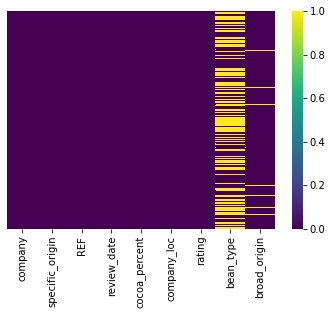

In [26]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')

plt.show()

In [27]:
#as the bean type column has almost 50% missing values, we can drop the entire column:

df = df.drop(['bean_type'], axis=1)

In [28]:
#Dropping REF column as it doesn't bring any value to the analysis:

df = df.drop(['REF'], axis=1)

In [29]:
#Dropping NaN values (broad_origin column):

df.dropna(inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1722 entries, 0 to 1794
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          1722 non-null   object 
 1   specific_origin  1722 non-null   object 
 2   review_date      1722 non-null   int64  
 3   cocoa_percent    1722 non-null   float64
 4   company_loc      1722 non-null   object 
 5   rating           1722 non-null   float64
 6   broad_origin     1722 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 107.6+ KB


# Data analysis:


## Cocoa percentage distribution

<h3>Let's check what is the most common cocoa percentage in chocolate

<span class="tocSkip"></span></h3>



/Users/agieen/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


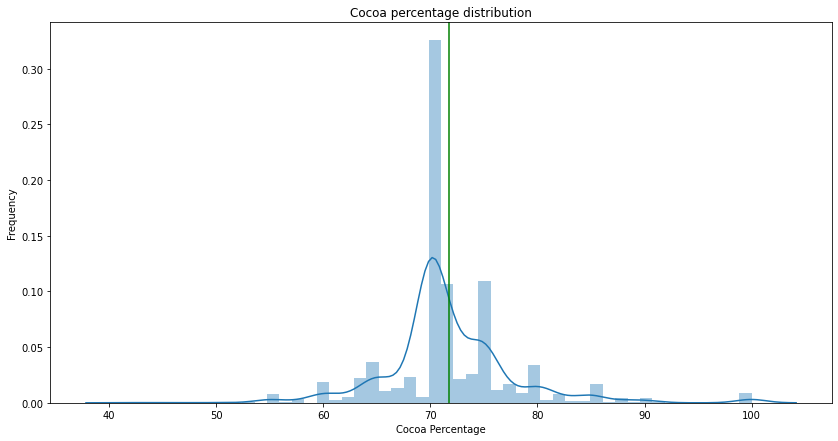

In [31]:
fig, ax = plt.subplots(figsize=(14,7))
sns.distplot(df.cocoa_percent)
ax.set_title('Cocoa percentage distribution')
plt.axvline(x=df.cocoa_percent.mean(), color= 'g')
ax.set(xlabel='Cocoa Percentage', ylabel='Frequency')


plt.show()

<h3>We can also plot a countplot to see the number of chocolate bars instead of frequency<span class="tocSkip"></span></h3>





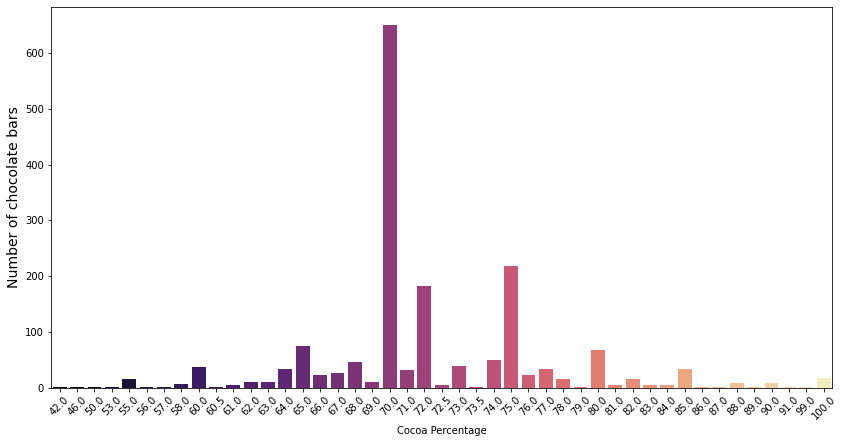

In [32]:

fig, ax = plt.subplots(figsize=(14,7))
sns.countplot(x='cocoa_percent',data=df, palette="magma")
plt.xlabel('Cocoa Percentage',size=10)
plt.ylabel('Number of chocolate bars',size=14)
plt.xticks(rotation=45)

plt.show()

<h3>
The most common cocoa percentage is in range of 70-75% <span class="tocSkip"></span></h3>


**Top 3 results:**

- 70.0   -  650 products
- 75.0   -  219 products
- 72.0   -  181 products




#df['cocoa_percent'].value_counts(ascending=False)


## Ratings distribution

/Users/agieen/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


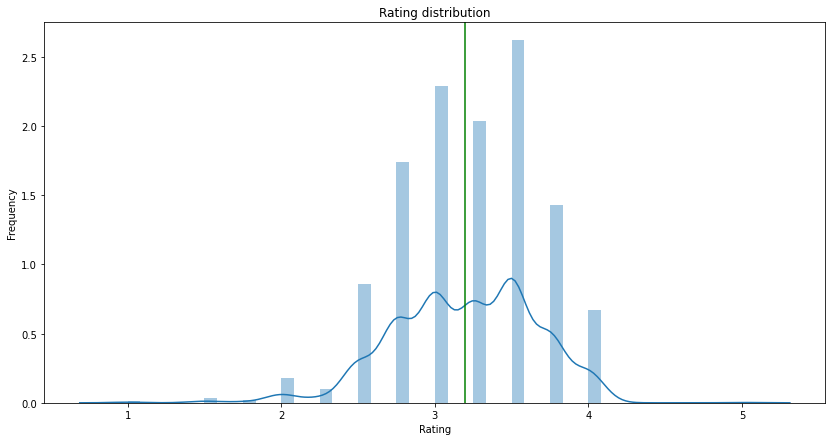

In [33]:
# Plotting the ratings distribution:

fig, ax = plt.subplots(figsize=(14,7))
sns.distplot(df.rating)
ax.set_title('Rating distribution')
plt.axvline(x=df.rating.mean(), color= 'g')
ax.set(xlabel='Rating', ylabel='Frequency');

<h4>Instad of frequency, we can check the number of ratings on the following countplot:<span class="tocSkip"></span></h4>


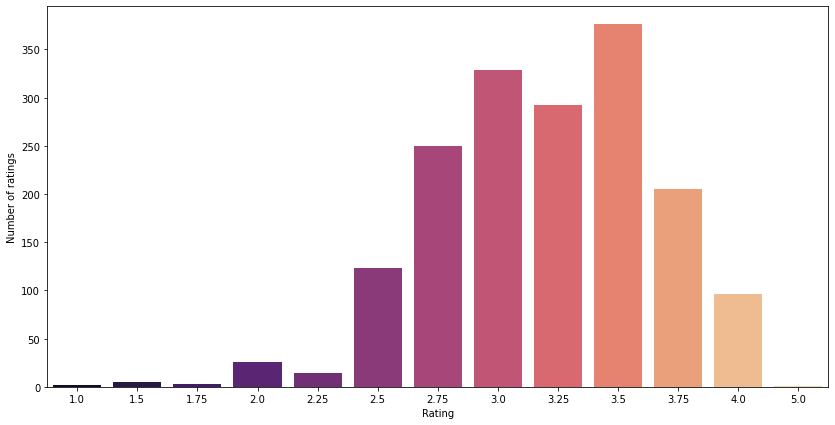

In [34]:
fig, ax = plt.subplots(figsize=(14,7))
sns.countplot(x='rating',data=df, palette="magma")
plt.xlabel('Rating',size=10)
plt.ylabel('Number of ratings',size=10)
plt.show()

In [33]:
#df['rating'].value_counts(ascending=False)



<h4>The most frequent ratings are in range 3.00 - 3.50

 
Is there any relation between the ratings and the cocoa percentage?<span class="tocSkip"></span></h4>




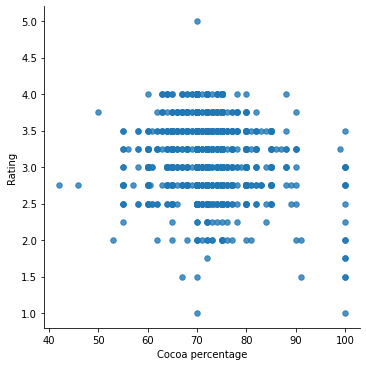

In [35]:
sns.lmplot(x='cocoa_percent', y='rating', fit_reg = False, scatter_kws={"s":30}, 
           data=df)
plt.xlabel('Cocoa percentage', size=10)
plt.ylabel('Rating', size=10)
ax.set_title('Relation between the cocoa percentage and ratings')
plt.show()

<h4>We can't observe any strong relation between the two variables. <span class="tocSkip"></span></h4>
    
The highest concentration of cocoa percentage is between 60% and 80% and the ratings concentrate between 2,5 and 4.


The plot doesn't indicate strong correlation in this case. 

 ## Top manufacturers
 
 What are the top 5 countries that produce chocolate?
 
 

In [36]:
df['company_loc'].value_counts()[0:5]


USA        738
France     144
Canada     117
UK          96
Ecuador     55
Name: company_loc, dtype: int64

------------
Which countries produce the best chocolate? (calculating the rating mean for each country - based on the company location)


In [37]:
rating_mean = df.groupby(by=['company_loc'])['rating'].mean()
rating_mean_sorted = rating_mean.sort_values( ascending=False)
rating_mean_sorted[0:10]


rat_mean= pd.DataFrame(rating_mean_sorted).reset_index()
rat_mean.columns = ['company_loc', 'rating_mean']
rat_mean[0:10]

,company_loc,rating_mean
0,Chile,3.750000
1,Poland,3.500000
2,Philippines,3.500000
3,Netherlands,3.500000
4,Iceland,3.416667
5,Vietnam,3.409091
6,Brazil,3.397059
7,Switzerland,3.392857
8,Australia,3.380435
9,Canada,3.350427


Despite the fact that the highest number of the companies are located in the USA, it doesn't appear in the top 10 list above.

Below, we can see a map with with the average rating per company.

In [39]:
# Map - average rating per company

fig = px.scatter_geo(rat_mean, locations="company_loc",
                     color = 'company_loc',
                     size='rating_mean',
                    locationmode = "country names") 

fig.update_layout(title_text = 'Rating - average per company location')

fig.show();

----

What about top companies with the highest rating average?



In [40]:

best_companies = df.groupby(by=['company'])['rating'].mean()
best_companies_sorted =best_companies.sort_values( ascending=False)
best_companies_sorted[0:10]


company
Tobago Estate (Pralus)                  4.0000
Ocelot                                  3.8750
Heirloom Cacao Preservation (Zokoko)    3.8750
Matale                                  3.8125
Patric                                  3.8000
Idilio (Felchlin)                       3.7750
Kerchner                                3.7500
Un Dimanche A Paris                     3.7500
Dole (Guittard)                         3.7500
Obolo                                   3.7500
Name: rating, dtype: float64

------

Let's check how many products do those company have:



In [41]:

best_comp_1 = df[(df['company'] == 'Tobago Estate (Pralus)') | (df['company'] == 'Ocelot') | (df['company'] == 'Heirloom Cacao Preservation (Zokoko)') | (df['company'] == 'Matale')| (df['company'] == 'Patric')]
best_comp_1.groupby(by='company')['company_loc'].value_counts()

company                               company_loc
Heirloom Cacao Preservation (Zokoko)  USA            2
Matale                                Australia      4
Ocelot                                Scotland       2
Patric                                USA            5
Tobago Estate (Pralus)                France         1
Name: company_loc, dtype: int64

Most of those companies have very few products, therefore it might not be the best indicator for the best chocolate.

In this case, it might be better to check which companies manufacture the highest quality chocolate, i.e. with ratings between 4 and 5. The bar plot below shows the top 10 companies that match this criteria.

In [42]:
top_comp = df[(df.rating >= 4)]
top_comp_val = top_comp['company'].value_counts()[0:10] 
top_companies = pd.DataFrame(top_comp_val).reset_index()
top_companies.columns = ['company', 'count']



In [43]:

fig = px.bar(top_companies, x= 'company', y= 'count', color= 'company', 
             title="Top 10 companies with products rated 4 or higher")
fig.show()

## Bean origin

Where do most of the beans come from? 

In [44]:
top_bean_producers = df['broad_origin'].value_counts()

top_bean = top_bean_producers[0:10]

#top_bean series to df:

top_beans= pd.DataFrame(top_bean).reset_index()
top_beans.columns = ['Country', 'Count']
top_beans




,Country,Count
0,Venezuela,226
1,Ecuador,195
2,Peru,172
3,Dominican Republic,169
4,Madagascar,147
5,Nicaragua,60
6,Brazil,58
7,Bolivia,57
8,Belize,49
9,Colombia,43


In [45]:
#Pie plot - bean origin percentage - top 10 countries 

fig = px.pie(top_beans, values='Count',names = "Country", color= 'Count', title="Bean Origin - top 10 countries ")
fig.show()

In [46]:
#Bar plot: bean origin - top 10 countries

fig = px.bar(top_beans.sort_values(by='Count', ascending=False ), x = 'Country', y = 'Count',
             color= 'Country', title="Bean Origin - top 10 countries")



fig.show()

Venezuela is clearly the leader when it comes to importing beans. 
Ecuador is on the 2nd place, followed by Peru and Dominican Republic. 

Most of the beans in this case come from South and Latin America. We can see it more visually on the following map:

In [47]:
fig = px.scatter_geo(top_beans, locations="Country",
                     color = 'Count',
                     size="Count",
                    locationmode = "country names") 

fig.update_layout(
    title_text = 'Bean Origin - top 10 countries' 
)

fig.show()

## Origin country

Let's check the average rating per origin country (top companies - products rated >4):

In [48]:
bean_top = top_comp.groupby(by=['broad_origin'])['rating'].mean()
bean_top_sorted = bean_top.sort_values(ascending=False)[0:10]

bean_top_origin = pd.DataFrame(bean_top_sorted).reset_index()
bean_top_origin.columns = ['Country', 'Avg_rating']
bean_top_origin[0:5]

,Country,Avg_rating
0,Venezuela,4.043478
1,Belize,4.000000
2,Bolivia,4.000000
3,Tobago,4.000000
4,St Lucia,4.000000


The highest average rating also belongs to Venezuela.

We can also check where do the top 3 companies that we've seen ealier (with their products rated 4 or higher) get their beans from.

The companies we will check are Soma, Bonnat and Valrhona

In [49]:
soma = df[df.company == 'Soma']
soma['broad_origin'].value_counts()[0:3]

Venezuela             10
Dominican Republic     7
Madagascar             4
Name: broad_origin, dtype: int64

In [50]:
bonnat = df[df.company == 'Bonnat']
bonnat['broad_origin'].value_counts()[0:3]

Venezuela    5
Brazil       4
Mexico       3
Name: broad_origin, dtype: int64

In [51]:
valrhona = df[df.company == 'Valrhona']
valrhona['broad_origin'].value_counts()[0:3]

Venezuela             6
Madagascar            2
Dominican Republic    2
Name: broad_origin, dtype: int64

<h4>All the top 3 companies import their beans from Venezuela. <span class="tocSkip"></span></h4>

What is an average rating by origin? (all data)

In [52]:
bean_top_rating = df.groupby(by=['broad_origin'])['rating'].mean()
bean_top_rat = bean_top_rating.sort_values(ascending=False)[0:10]
bean_top_rat 


broad_origin
Tobago              3.625000
South America       3.500000
Solomon Islands     3.437500
Haiti               3.388889
Honduras            3.350000
Guatemala           3.344828
Congo               3.325000
Vietnam             3.315789
Papua New Guinea    3.302326
Brazil              3.284483
Name: rating, dtype: float64

The results are different in this case. The average rating is <3.7

## Reviews

What is the number of reviews per year?

In [54]:
rev_year = df['review_date'].value_counts()
type(rev_year)

rev_y= pd.DataFrame(rev_year).reset_index()
rev_y.columns = ['year', 'count']


In [55]:
#Pie plot - reviews per year in percentage:

fig = px.pie(rev_y, values='count',names = "year", color= 'year', title="Number of ratings per year")
fig.update_traces(textinfo='percent+label', textposition='inside', textfont_size=14)

fig.show()

In [56]:
#Bar plot: number of ratings per year

fig = px.bar(rev_y.sort_values(by='count', ), x = 'year', y = 'count',
             color= 'year', title="Number of ratings per year")


fig.show()

<h4>As we can see on the plots above, in 2015 there's 3,5% more reviews than in the previous year. We have a ver small amount of reviews from 2017.<span class="tocSkip"></span></h4>

Let's see what was an average rating per year of the bean origin.

In [57]:
br_year = df.groupby(by=['review_date','broad_origin'])['rating'].mean()
#br_year[0:30]

orign_year_avrat=pd.DataFrame(br_year).reset_index()
orign_year_avrat.columns = ['year', 'origin', 'av_rating']
orign_year_avrat.sort_values(by='av_rating',ascending=False)[0:10]

,year,origin,av_rating
0,2006,Bolivia,4.000
175,2012,Tobago,4.000
196,2013,Guatemala,4.000
13,2006,Papua New Guinea,4.000
12,2006,Mexico,4.000
16,2006,South America,4.000
128,2011,Haiti,4.000
132,2011,Indonesia,3.875
43,2008,Congo,3.750
281,2016,Australia,3.750


To visualize it better, we can check the following map:

In [58]:
# map - Average rating of the bean origin
fig = px.choropleth(orign_year_avrat, locations="origin", color="av_rating", 
                    locationmode='country names',
                    animation_frame='year',
                    range_color=[2,4],
                    color_continuous_scale=px.colors.sequential.OrRd
                   )

fig.update_layout(title='Average rating of the origin')
fig.show()

Through the map we can observe the changes in the number of countries reviewd each year. E.g. In 2015 there were more reviews of south-east Asia and Africa than in some other years. 
In order to see how the average ratings were changing over year for the origin countries, we can plot a cross table heatmap.

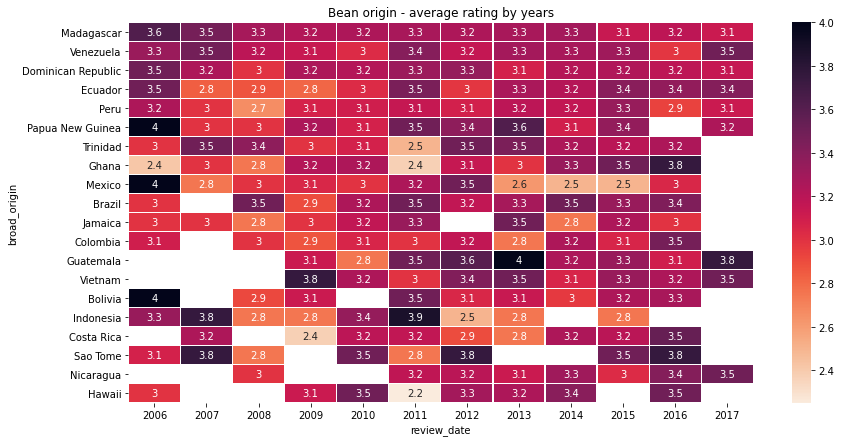

In [59]:
diag = pd.crosstab(df['broad_origin'], df['review_date'], df['rating'], aggfunc='mean')
diag['total'] = diag.sum(axis=1)
diag = diag.sort_values('total', ascending=False)
diag = diag.drop('total', axis=1)

fig, ax = plt.subplots(figsize=[14,7])
sns.heatmap(diag[0:20], cmap='rocket_r', linewidths=0.2, annot=True)
ax.set_title('Bean origin - average rating by years');




The heatmap allows us to further analyse the changes throughout the years. E.g we can see that the quality of the beans from Madagascar has a negative trend.  The beans from Ecuador seem to improve their quality. Venezuela and Dominican Republic have very similar ratings throughout the years.

Let's check the average rating of the comapny locations by years:

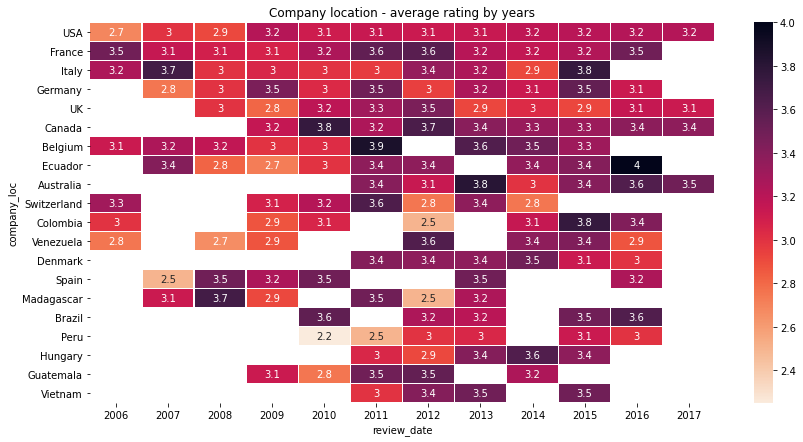

In [60]:
diag = pd.crosstab(df['company_loc'], df['review_date'], df['rating'], aggfunc='mean')
diag['total'] = diag.sum(axis=1)
diag = diag.sort_values('total', ascending=False)
diag = diag.drop('total', axis=1)

fig, ax = plt.subplots(figsize=[14,7])
sns.heatmap(diag[0:20], cmap='rocket_r', linewidths=0.2, annot=True)
ax.set_title('Company location - average rating by years');



We can observe that the quality of products from the USA is increasing. In other countries, it fluctuates more and there's no clear rising trend as in case of the USA

We can do the same with the companies:



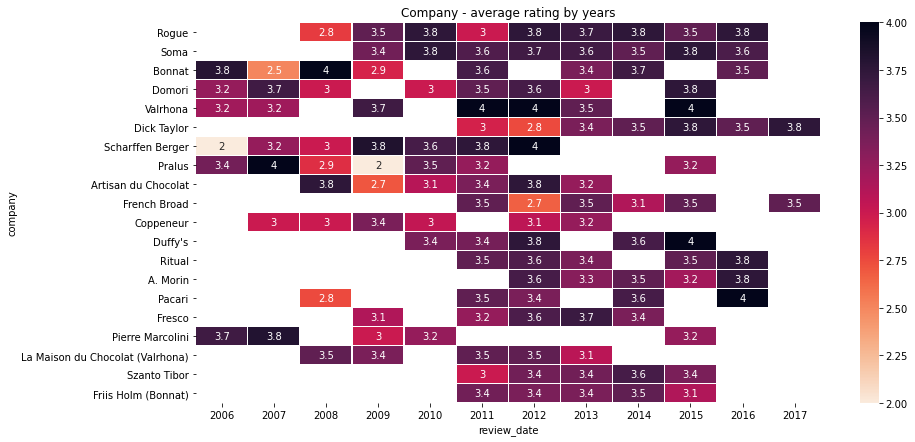

In [61]:
diag = pd.crosstab(df['company'], df['review_date'], df['rating'], aggfunc='mean')
diag['total'] = diag.sum(axis=1)
diag = diag.sort_values('total', ascending=False)
diag = diag.drop('total', axis=1)

fig, ax = plt.subplots(figsize=[14,7])
sns.heatmap(diag[0:20], cmap='rocket_r', linewidths=0.2, annot=True)
ax.set_title('Company - average rating by years');

It's interesting to see that Valrhona, one of the top 3 companies with the highest rated products, had an average of 4 for 3 years. None of the remaining companies managed to have such a high rating more than once.

# CONCLUSIONS

Some of the chocolate bars manufacturers seem to produce better quality chocolate than others, however, none of them is consistent enough to be considered a clear leader.

Taking into consideration the ratings, it looks like some of the manufacturers with very high ratings but few products, might deliver better quality products as they can focus their attention on them in a more effective way.

There is no one strong idicator that would lead us to a better quality product though.

